In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
!pip install gdown

In [3]:
import gdown
import zipfile
import os

# Google Drive file ID
file_id = '1wHbHZY6m5guxde1ze-IedjY6eMqiwzOX'
url = f'https://drive.google.com/uc?id={file_id}'

# Local paths
zip_file_path = '/content/dataset.zip'
extract_to_dir = '/content/sample_data'

# Download the file
gdown.download(url, zip_file_path, quiet=False)

# Create the directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Unzip the file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_dir)
    print(f'Dataset extracted to {extract_to_dir}')
except zipfile.BadZipFile:
    print("The file is not a zip file or is corrupted.")

Downloading...
From (original): https://drive.google.com/uc?id=1wHbHZY6m5guxde1ze-IedjY6eMqiwzOX
From (redirected): https://drive.google.com/uc?id=1wHbHZY6m5guxde1ze-IedjY6eMqiwzOX&confirm=t&uuid=1a567c93-92cc-4e37-b5bc-76772c933cad
To: /content/dataset.zip
100%|██████████| 1.45G/1.45G [00:05<00:00, 252MB/s]


Dataset extracted to /content/sample_data


In [4]:
import os

# Directory where the images are stored
dataset_dir = '/content/sample_data/FAE_D1_collated - use'  # Update this path to your dataset directory

# List all files in the directory
files = os.listdir(dataset_dir)

# Iterate over files and remove those with "copy" in the filename
for file_name in files:
    if 'copy' in file_name:
        file_path = os.path.join(dataset_dir, file_name)
        os.remove(file_path)
        print(f'Removed: {file_path}')

print('Files with "copy" in the filename have been removed.')


Files with "copy" in the filename have been removed.


In [5]:
import os

# Directory where the images are stored
dataset_dir = '/content/sample_data/FAE_D1_collated - use'  # Update this path to your dataset directory

# List all files in the directory
files = os.listdir(dataset_dir)

# Print files containing "copy" in their names
copy_files = [f for f in files if 'copy' in f]
print(f"Files containing 'copy': {copy_files}")


Files containing 'copy': []


In [6]:
import os

# Directory where the images are stored
dataset_dir = '/content/sample_data/FAE_D1_collated - use'  # Update this path to your dataset directory

# List all files in the directory
files = os.listdir(dataset_dir)

# Iterate over files and remove those with "Copy" in the filename
for file_name in files:
    if 'Copy' in file_name:
        file_path = os.path.join(dataset_dir, file_name)
        os.remove(file_path)
        print(f'Removed: {file_path}')

# Verify removal
remaining_files = os.listdir(dataset_dir)
print("Remaining files:", remaining_files)


Streaming output truncated to the last 5000 lines.
Removed: /content/sample_data/FAE_D1_collated - use/56_0_6_28 - Copy.jpg
Removed: /content/sample_data/FAE_D1_collated - use/27_0_6_12 - Copy.jpg
Removed: /content/sample_data/FAE_D1_collated - use/69_0_6_12 - Copy.jpg
Removed: /content/sample_data/FAE_D1_collated - use/56_1_1_20 - Copy.png
Removed: /content/sample_data/FAE_D1_collated - use/56_0_1_36 - Copy.jpg
Removed: /content/sample_data/FAE_D1_collated - use/36_0_6_14 - Copy.jpg
Removed: /content/sample_data/FAE_D1_collated - use/19_1_5_27 - Copy.png
Removed: /content/sample_data/FAE_D1_collated - use/29_0_5_32 - Copy.jpg
Removed: /content/sample_data/FAE_D1_collated - use/55_0_4_14 - Copy.png
Removed: /content/sample_data/FAE_D1_collated - use/31_1_4_19 - Copy.png
Removed: /content/sample_data/FAE_D1_collated - use/30_1_4_7 - Copy.jpg
Removed: /content/sample_data/FAE_D1_collated - use/17_1_1_46 - Copy.jpg
Removed: /content/sample_data/FAE_D1_collated - use/63_0_6_30 - Copy.jpg
R

In [7]:
# Define the base directory for the dataset
BASE_DIR = "/content/sample_data/FAE_D1_collated - use"

In [8]:
# Initialize lists to store image paths and labels
image_paths = []
age_labels = []
gender_labels = []

In [9]:
# labels = age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []
from tqdm import tqdm
for filename in tqdm(os.listdir(BASE_DIR)):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        temp = filename.split('_')
        if len(temp) >= 3 and temp[0].isdigit() and temp[1].isdigit():
            age = int(temp[0])
            gender = int(temp[1])
            image_path = os.path.join(BASE_DIR, filename)
            image_paths.append(image_path)
            age_labels.append(age)
            gender_labels.append(gender)
        else:
            print(f"Skipping file {filename} as it doesn't match the expected format.")
    else:
        print(f"Skipping non-image file: {filename}")


100%|██████████| 15001/15001 [00:00<00:00, 405299.89it/s]


In [10]:
# Convert to DataFrame
df = pd.DataFrame()
df['image'] = image_paths
df['age'] = age_labels
df['gender'] = gender_labels

In [11]:
gender_dict = {0: 'Male', 1: 'Female'}

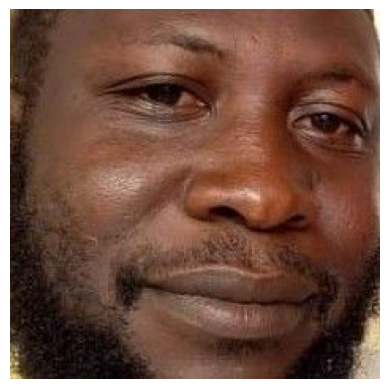

In [12]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img)
plt.show()

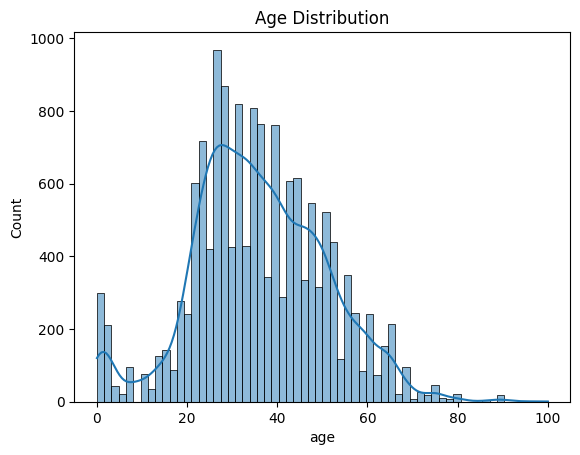

In [13]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

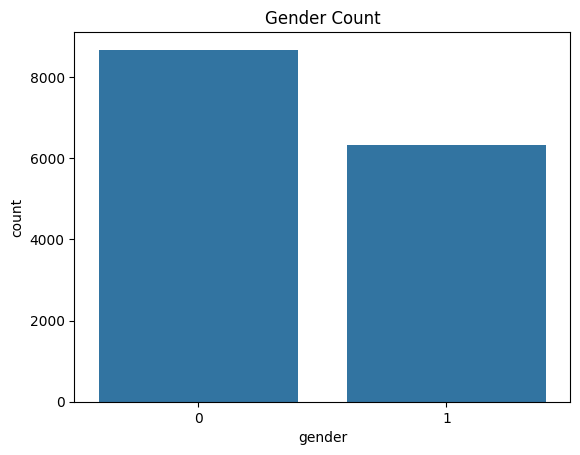

In [14]:
sns.countplot(x='gender', data=df)
plt.title('Gender Count')
plt.show()

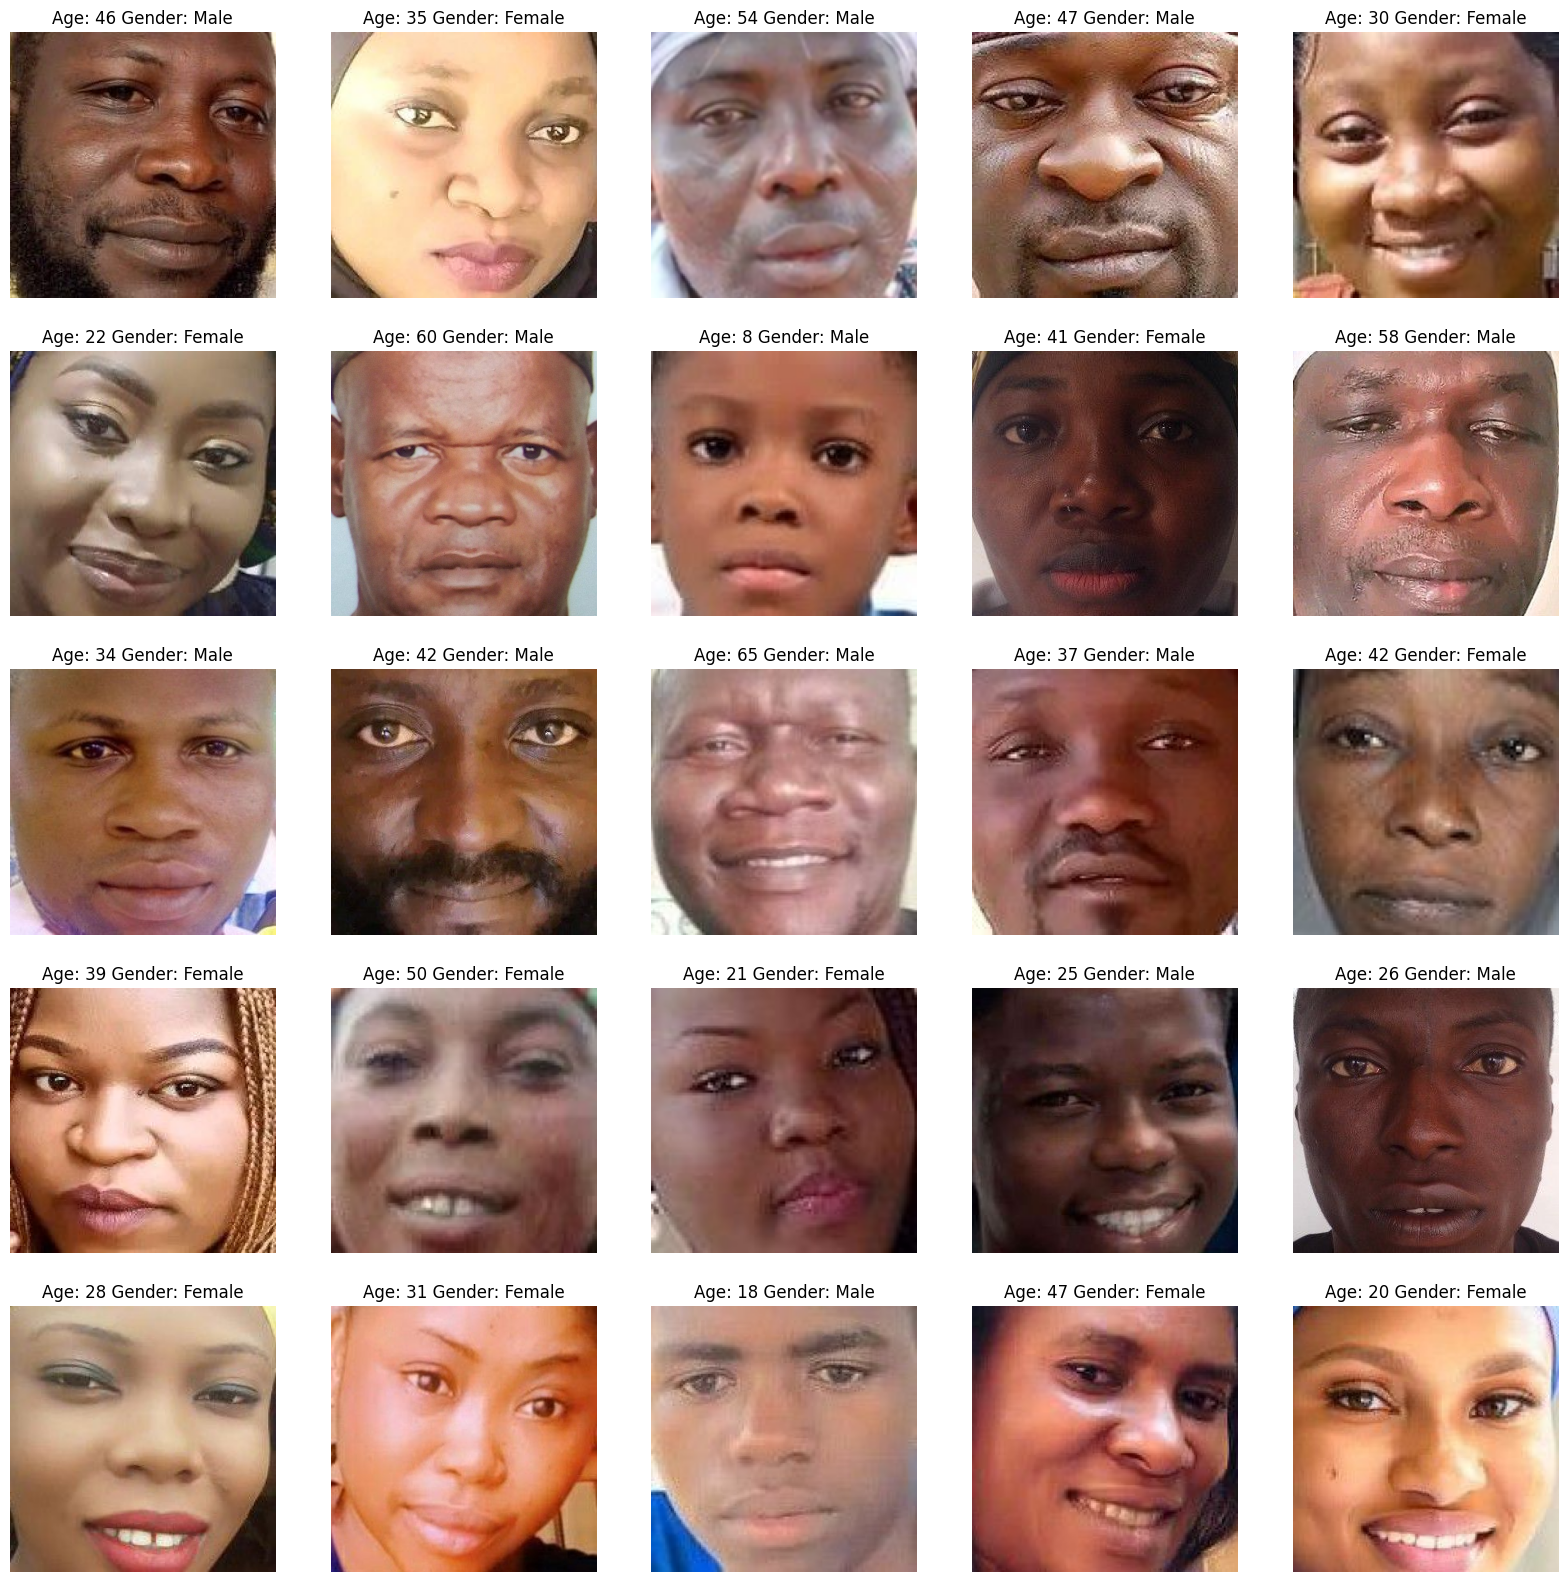

In [15]:
# to display grid of img
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, row in files.iterrows():
    plt.subplot(5, 5, index + 1)
    img = load_img(row['image'])
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {row['age']} Gender: {gender_dict[row['gender']]}")
    plt.axis('off')

plt.show()


In [16]:
# Image size expected by InceptionV3
IMG_SIZE = (224, 224)

In [17]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0  # Normalize pixel values
    return img


In [18]:
# Load images and convert labels to numpy arrays
images = np.array([load_and_preprocess_image(path) for path in df['image']])
ages = np.array(df['age'])
genders = np.array(df['gender'])

In [19]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, ages, test_size=0.2, random_state=42)

In [20]:
# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [21]:
# Add custom layers for age prediction
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)  # Linear activation for age regression

In [22]:
# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

In [23]:
# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

In [24]:

# Compile the model with SGD optimizer
model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),  # Define SGD optimizer with learning rate and momentum
    loss='mean_squared_error',  # Loss function for regression tasks
    metrics=['mae']  # Metric to monitor: Mean Absolute Error
)


In [25]:
# Use ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


In [26]:
# Train the model
batch_size = 32
epochs = 15

# Store the training history in a variable
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=epochs,
    steps_per_epoch=len(X_train) // batch_size
)

Epoch 1/15
375/375 [==============================] - 173s 450ms/step - loss: 329.9414 - mae: 13.7760 - val_loss: 140.1701 - val_mae: 9.1543
Epoch 2/15
375/375 [==============================] - 163s 434ms/step - loss: 185.4172 - mae: 10.7480 - val_loss: 168.1437 - val_mae: 10.3036
Epoch 3/15
375/375 [==============================] - 164s 437ms/step - loss: 171.4985 - mae: 10.5431 - val_loss: 144.2306 - val_mae: 9.5167
Epoch 4/15
375/375 [==============================] - 163s 436ms/step - loss: 159.7990 - mae: 10.0344 - val_loss: 147.7012 - val_mae: 9.6146
Epoch 5/15
375/375 [==============================] - 163s 433ms/step - loss: 197.8385 - mae: 11.1174 - val_loss: 213.9497 - val_mae: 11.4198
Epoch 6/15
375/375 [==============================] - 163s 435ms/step - loss: 211.1470 - mae: 11.5406 - val_loss: 183.0966 - val_mae: 10.8941
Epoch 7/15
375/375 [==============================] - 162s 433ms/step - loss: 199.6720 - mae: 11.2672 - val_loss: 213.8006 - val_mae: 11.3942
Epoch 8/1

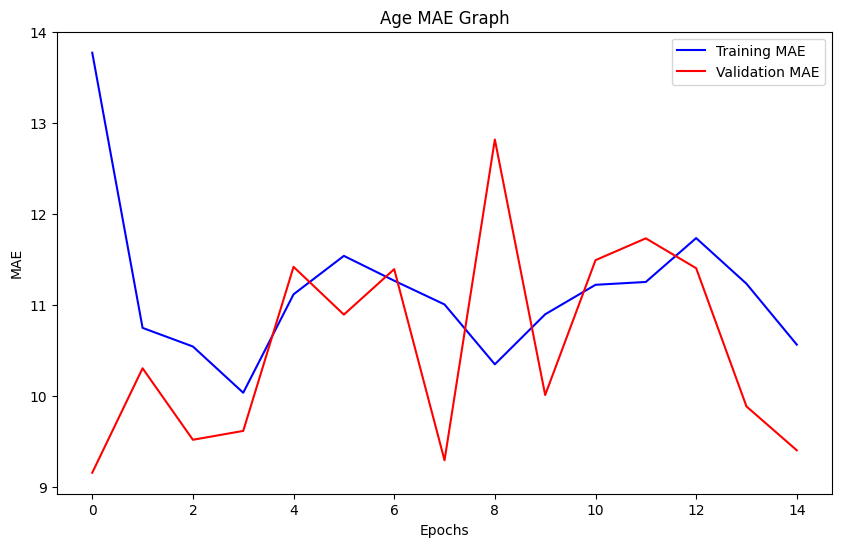

In [27]:
# Plot results for age MAE
loss = history.history['mae']          # Training MAE
val_loss = history.history['val_mae']  # Validation MAE
epochs_range = range(len(loss))

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, loss, 'b', label='Training MAE')
plt.plot(epochs_range, val_loss, 'r', label='Validation MAE')
plt.title('Age MAE Graph')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Original Age: 24
1/1 [==============================] - 0s 63ms/step
Predicted Age: 31


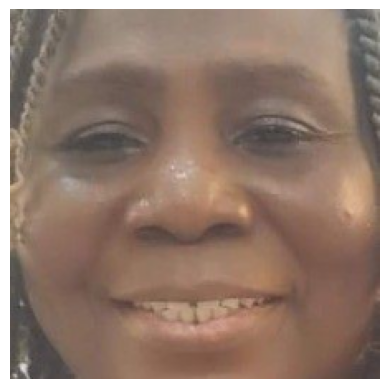

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'X' is your dataset

# Define the index of the image you want to predict
image_index = 50

# Display the original label
print("Original Age:", ages[image_index])  # Since we're focusing on age

# Predict using the model
pred = model.predict(X_val[image_index].reshape(1, 224, 224, 3))

# Extract the predicted age
predicted_age = round(pred[0][0])  # Since we have a single output for age

# Print the predicted age
print("Predicted Age:", predicted_age)

# Display the image
plt.axis('off')
plt.imshow(X_val[image_index].reshape(224, 224, 3))
plt.show()


Original Age: 58
1/1 [==============================] - 0s 59ms/step
Predicted Age: 31


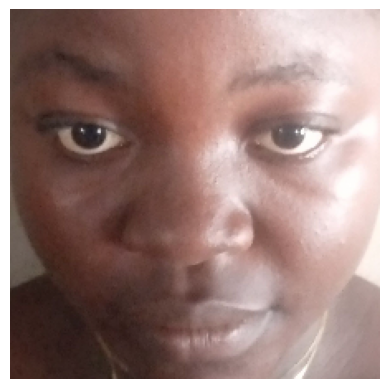

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'X' is your dataset

# Define the index of the image you want to predict
image_index = 90

# Display the original label
print("Original Age:", ages[image_index])  # Since we're focusing on age

# Predict using the model
pred = model.predict(X_val[image_index].reshape(1, 224, 224, 3))

# Extract the predicted age
predicted_age = round(pred[0][0])  # Since we have a single output for age

# Print the predicted age
print("Predicted Age:", predicted_age)

# Display the image
plt.axis('off')
plt.imshow(X_val[image_index].reshape(224, 224, 3))
plt.show()

In [31]:
# Save the model to Google Drive
model.save('age_estimation3_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
